In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
data=pd.read_csv('OnlineRetail.csv',encoding="latin1")

In [3]:

''''
from ydata_profiling import ProfileReport
import pandas as pd

data = pd.read_csv("OnlineRetail.csv", encoding="latin1")
file = ProfileReport(data, title="Online Retail EDA Report", explorative=True)
file.to_file("project.html")
''''


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:27<00:00,  3.44s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
data['CustomerID']=impute.fit_transform(data[['CustomerID']])
impute=SimpleImputer(strategy='most_frequent')
data['Description']=impute.fit_transform(data[['Description']]).ravel()

In [28]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [48]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [31]:
print("Mean OF Numerical Columns")
data[['UnitPrice', 'Quantity']].mean()


Mean OF Numerical Columns


UnitPrice    4.611114
Quantity     9.552250
dtype: float64

In [32]:
print("Median OF Numerical Columns")
data[['UnitPrice', 'Quantity']].median()

Median OF Numerical Columns


UnitPrice    2.08
Quantity     3.00
dtype: float64

In [33]:
print("STD OF Numerical Columns")
data[['UnitPrice', 'Quantity']].std()

STD OF Numerical Columns


UnitPrice     96.759853
Quantity     218.081158
dtype: float64

In [58]:
dp=data.duplicated().sum()
dp

0

In [43]:
data=data.drop_duplicates()

Month
2010-12     746723.610
2011-01     558448.560
2011-02     497026.410
2011-03     682013.980
2011-04     492367.841
2011-05     722094.100
2011-06     689977.230
2011-07     680156.991
2011-08     681386.460
2011-09    1017596.682
2011-10    1069368.230
2011-11    1456145.800
2011-12     432701.060
Freq: M, Name: Total_Amount, dtype: float64


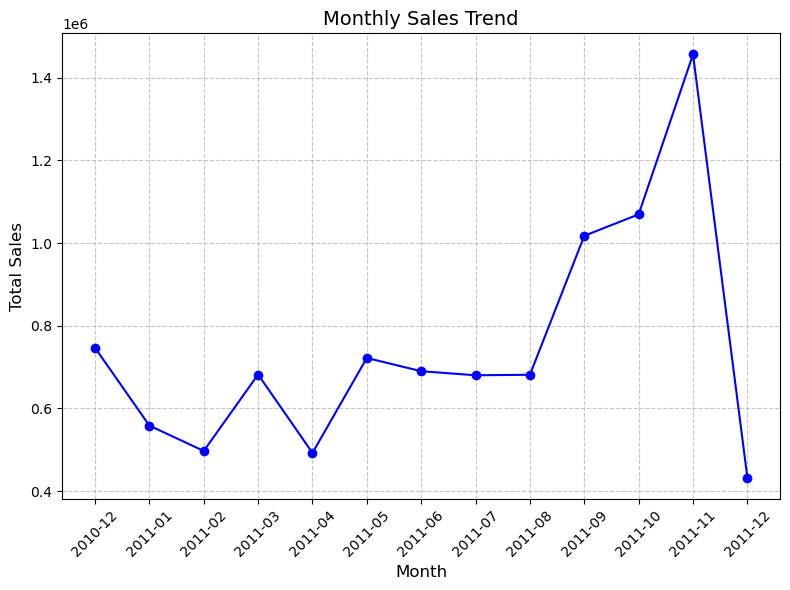

In [52]:
#Monthly Sale Trend
data['Month'] = data['InvoiceDate'].dt.to_period('M')
data['Total_Amount'] = data['Quantity'] * data['UnitPrice']
Monthly_Sale = data.groupby('Month')['Total_Amount'].sum()
print(Monthly_Sale)
#Plot
plt.figure(figsize=(8,6))
plt.plot(Monthly_Sale.index.astype(str) , Monthly_Sale.values , marker='o' , color='blue')
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2045.53
18287.0    1837.28
Name: Total_Amount, Length: 4372, dtype: float64


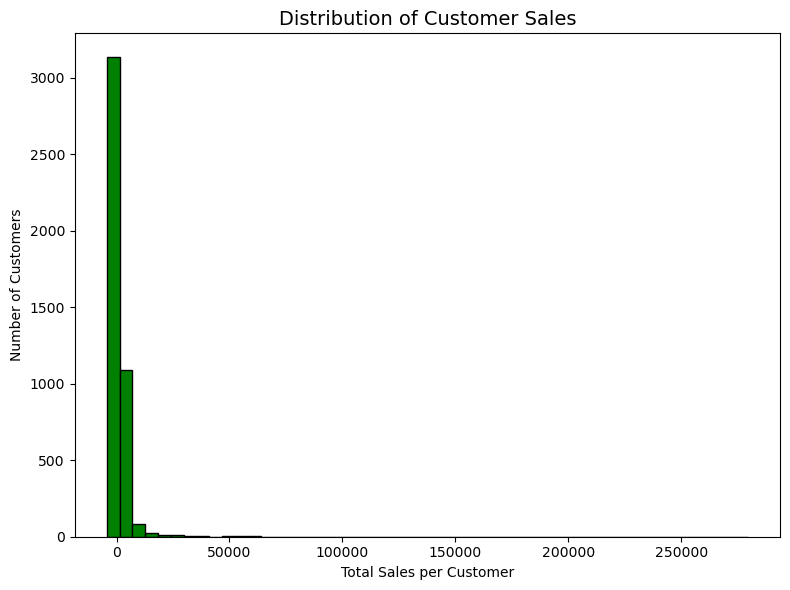

In [56]:
#Customer Sales
Customer_Sale = data.groupby('CustomerID')['Total_Amount'].sum()
print(Customer_Sale)

plt.figure(figsize=(8,6))
plt.hist(Customer_Sale, bins=50, color='green', edgecolor='black')

plt.title("Distribution of Customer Sales", fontsize=14)
plt.xlabel("Total Sales per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

Country
United Kingdom    8167128.184
Netherlands        284661.540
EIRE               262993.380
Germany            221509.470
France             197317.110
Australia          137009.770
Switzerland         56363.050
Spain               54756.030
Belgium             40910.960
Sweden              36585.410
Name: Total_Amount, dtype: float64


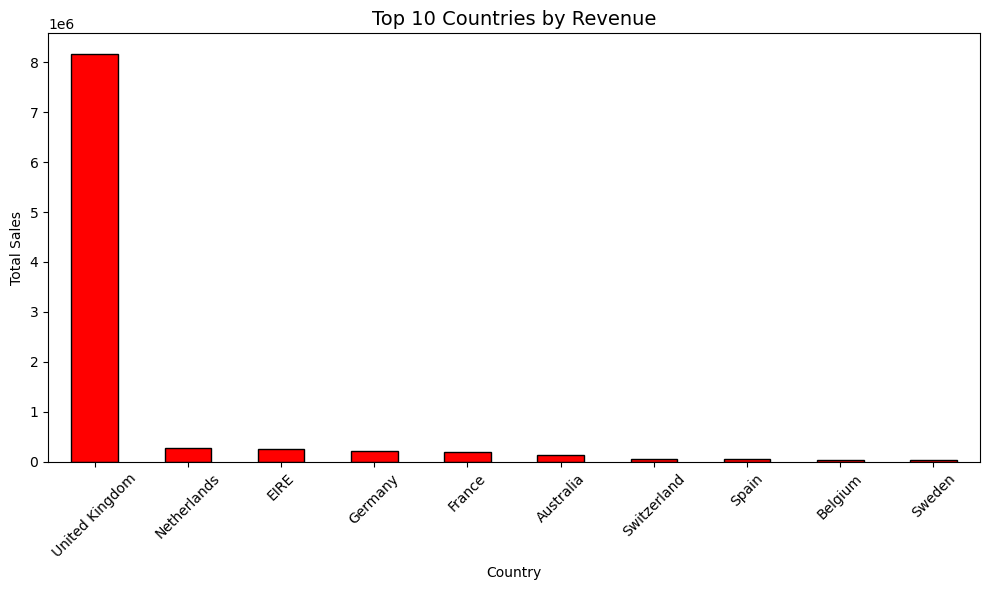

In [57]:
country_sales = data.groupby('Country')['Total_Amount'].sum().nlargest(10)
print(country_sales)


# Plot
plt.figure(figsize=(10,6))
country_sales.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Countries by Revenue', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()